# Optimisation Case Study - Staff Planning

    An insurance company InsurePlus wants us to help them with finding the optimal number of staff 
    for their insurance application approval process for the calendar year 2021.

## Steps: 
    1 Reading data from Excel workbook
    2 Data Preprocessing
    3 Task related to Questions


# Reading data from Excel workbook

In [1]:
# Importing Libraries 

import pandas as pd
import numpy as np
import math
from pyomo.environ import *

In [2]:
from __future__ import division
from pyomo.opt import SolverFactory

In [3]:
# Reading the data from Excel workbook
InputData=(r'C:\Users\anubhav\Documents\Python\Business Requirements\Optimisation Case Study - Staff Planning/Staffing+Data.xlsx')

In [4]:
MyDemandList = pd.read_excel(InputData,sheet_name="DemandData")
StaffAvail = pd.read_excel(InputData,sheet_name="StaffAvailability")
Cost = pd.read_excel(InputData,sheet_name="Cost")
ServiceRate = pd.read_excel(InputData,sheet_name="ServiceRate")
DataDict = pd.read_excel(InputData,sheet_name="Data Dictionary")

In [5]:
# Observing the data in MyDemandList
MyDemandList.head()

,State,Month,Demand
0,A,Jan,5240
1,A,Feb,4878
2,A,Mar,5942
3,A,Apr,2297
4,A,May,1992


In [6]:
# Observing the data in StaffAvail
StaffAvail.head()

,State,Month,LB,UB,StaffAvPer
0,A,Jan,0.70,0.90,0.81
1,A,Feb,0.65,0.85,0.76
2,A,Mar,0.70,0.80,0.75
3,A,Apr,0.75,0.85,0.80
4,A,May,0.70,0.85,0.78


In [7]:
# Observing the data in Cost
Cost.head()

,State,Month,AnnualSalary,MonthlySalary,UnitOutSourceCost
0,A,Jan,60000,5000.0,180
1,A,Feb,60000,5000.0,180
2,A,Mar,60000,5000.0,180
3,A,Apr,60000,5000.0,180
4,A,May,60000,5000.0,180


In [8]:
# Observing the data in ServiceRate
ServiceRate

,MgAppServedPerMonth
0,40












## Data pre-processing 

In [9]:
# Create the required Python data structures for indexes and parameters
# Creating dictionary for Demand
Demand = MyDemandList.set_index(['State','Month'])['Demand'].to_dict()

In [10]:
# Dictionary for Demand
Demand

{('A', 'Jan'): 5240,
 ('A', 'Feb'): 4878,
 ('A', 'Mar'): 5942,
 ('A', 'Apr'): 2297,
 ('A', 'May'): 1992,
 ('A', 'Jun'): 2275,
 ('A', 'Jul'): 5334,
 ('A', 'Aug'): 3371,
 ('A', 'Sep'): 3759,
 ('A', 'Oct'): 3529,
 ('A', 'Nov'): 4284,
 ('A', 'Dec'): 5183,
 ('B', 'Jan'): 4927,
 ('B', 'Feb'): 2628,
 ('B', 'Mar'): 2974,
 ('B', 'Apr'): 2338,
 ('B', 'May'): 4020,
 ('B', 'Jun'): 3147,
 ('B', 'Jul'): 4271,
 ('B', 'Aug'): 2620,
 ('B', 'Sep'): 4517,
 ('B', 'Oct'): 4155,
 ('B', 'Nov'): 3137,
 ('B', 'Dec'): 4227,
 ('C', 'Jan'): 1162,
 ('C', 'Feb'): 1967,
 ('C', 'Mar'): 1898,
 ('C', 'Apr'): 2261,
 ('C', 'May'): 2030,
 ('C', 'Jun'): 1642,
 ('C', 'Jul'): 2489,
 ('C', 'Aug'): 2496,
 ('C', 'Sep'): 922,
 ('C', 'Oct'): 2421,
 ('C', 'Nov'): 963,
 ('C', 'Dec'): 1998}

In [11]:
# Creating dictionary for StaffAvail_LB
StaffAvail_LB =StaffAvail.set_index(['State','Month'])['LB'].to_dict()

In [12]:
# Dictionary for StaffAvail_LB
StaffAvail_LB

{('A', 'Jan'): 0.7,
 ('A', 'Feb'): 0.65,
 ('A', 'Mar'): 0.7,
 ('A', 'Apr'): 0.75,
 ('A', 'May'): 0.7,
 ('A', 'Jun'): 0.65,
 ('A', 'Jul'): 0.6,
 ('A', 'Aug'): 0.65,
 ('A', 'Sep'): 0.7,
 ('A', 'Oct'): 0.65,
 ('A', 'Nov'): 0.6,
 ('A', 'Dec'): 0.6,
 ('B', 'Jan'): 0.7,
 ('B', 'Feb'): 0.65,
 ('B', 'Mar'): 0.7,
 ('B', 'Apr'): 0.75,
 ('B', 'May'): 0.7,
 ('B', 'Jun'): 0.65,
 ('B', 'Jul'): 0.6,
 ('B', 'Aug'): 0.65,
 ('B', 'Sep'): 0.7,
 ('B', 'Oct'): 0.65,
 ('B', 'Nov'): 0.6,
 ('B', 'Dec'): 0.6,
 ('C', 'Jan'): 0.7,
 ('C', 'Feb'): 0.65,
 ('C', 'Mar'): 0.7,
 ('C', 'Apr'): 0.75,
 ('C', 'May'): 0.7,
 ('C', 'Jun'): 0.65,
 ('C', 'Jul'): 0.6,
 ('C', 'Aug'): 0.65,
 ('C', 'Sep'): 0.7,
 ('C', 'Oct'): 0.65,
 ('C', 'Nov'): 0.6,
 ('C', 'Dec'): 0.6}

In [13]:
#Creating dictionary for StaffAvail_UB
StaffAvail_UB =StaffAvail.set_index(['State','Month'])['UB'].to_dict()

In [14]:
# Dictionary for StaffAvail_UB
StaffAvail_UB

{('A', 'Jan'): 0.9,
 ('A', 'Feb'): 0.85,
 ('A', 'Mar'): 0.8,
 ('A', 'Apr'): 0.85,
 ('A', 'May'): 0.85,
 ('A', 'Jun'): 0.8,
 ('A', 'Jul'): 0.75,
 ('A', 'Aug'): 0.85,
 ('A', 'Sep'): 0.9,
 ('A', 'Oct'): 0.8,
 ('A', 'Nov'): 0.75,
 ('A', 'Dec'): 0.7,
 ('B', 'Jan'): 0.9,
 ('B', 'Feb'): 0.85,
 ('B', 'Mar'): 0.8,
 ('B', 'Apr'): 0.85,
 ('B', 'May'): 0.85,
 ('B', 'Jun'): 0.8,
 ('B', 'Jul'): 0.75,
 ('B', 'Aug'): 0.85,
 ('B', 'Sep'): 0.9,
 ('B', 'Oct'): 0.8,
 ('B', 'Nov'): 0.75,
 ('B', 'Dec'): 0.7,
 ('C', 'Jan'): 0.9,
 ('C', 'Feb'): 0.85,
 ('C', 'Mar'): 0.8,
 ('C', 'Apr'): 0.85,
 ('C', 'May'): 0.85,
 ('C', 'Jun'): 0.8,
 ('C', 'Jul'): 0.75,
 ('C', 'Aug'): 0.85,
 ('C', 'Sep'): 0.9,
 ('C', 'Oct'): 0.8,
 ('C', 'Nov'): 0.75,
 ('C', 'Dec'): 0.7}

In [15]:
#Creating dictionary for StaffAvPer
StaffAvPer=StaffAvail.set_index(['State','Month'])['StaffAvPer'].to_dict()

In [16]:
# Dictionary for StaffAvPer
StaffAvPer

{('A', 'Jan'): 0.81,
 ('A', 'Feb'): 0.76,
 ('A', 'Mar'): 0.75,
 ('A', 'Apr'): 0.8,
 ('A', 'May'): 0.78,
 ('A', 'Jun'): 0.73,
 ('A', 'Jul'): 0.68,
 ('A', 'Aug'): 0.76,
 ('A', 'Sep'): 0.81,
 ('A', 'Oct'): 0.73,
 ('A', 'Nov'): 0.68,
 ('A', 'Dec'): 0.65,
 ('B', 'Jan'): 0.81,
 ('B', 'Feb'): 0.76,
 ('B', 'Mar'): 0.75,
 ('B', 'Apr'): 0.8,
 ('B', 'May'): 0.78,
 ('B', 'Jun'): 0.73,
 ('B', 'Jul'): 0.68,
 ('B', 'Aug'): 0.76,
 ('B', 'Sep'): 0.81,
 ('B', 'Oct'): 0.73,
 ('B', 'Nov'): 0.68,
 ('B', 'Dec'): 0.65,
 ('C', 'Jan'): 0.81,
 ('C', 'Feb'): 0.76,
 ('C', 'Mar'): 0.75,
 ('C', 'Apr'): 0.8,
 ('C', 'May'): 0.78,
 ('C', 'Jun'): 0.73,
 ('C', 'Jul'): 0.68,
 ('C', 'Aug'): 0.76,
 ('C', 'Sep'): 0.81,
 ('C', 'Oct'): 0.73,
 ('C', 'Nov'): 0.68,
 ('C', 'Dec'): 0.65}

In [17]:
#Creating dictionary for Staff
Staff=Cost.set_index(['State','Month'])['MonthlySalary'].to_dict()

In [18]:
#Dictionary for Staff
Staff

{('A', 'Jan'): 5000.0,
 ('A', 'Feb'): 5000.0,
 ('A', 'Mar'): 5000.0,
 ('A', 'Apr'): 5000.0,
 ('A', 'May'): 5000.0,
 ('A', 'Jun'): 5000.0,
 ('A', 'Jul'): 5000.0,
 ('A', 'Aug'): 5000.0,
 ('A', 'Sep'): 5000.0,
 ('A', 'Oct'): 5000.0,
 ('A', 'Nov'): 5000.0,
 ('A', 'Dec'): 5000.0,
 ('B', 'Jan'): 4583.333333333333,
 ('B', 'Feb'): 4583.333333333333,
 ('B', 'Mar'): 4583.333333333333,
 ('B', 'Apr'): 4583.333333333333,
 ('B', 'May'): 4583.333333333333,
 ('B', 'Jun'): 4583.333333333333,
 ('B', 'Jul'): 4583.333333333333,
 ('B', 'Aug'): 4583.333333333333,
 ('B', 'Sep'): 4583.333333333333,
 ('B', 'Oct'): 4583.333333333333,
 ('B', 'Nov'): 4583.333333333333,
 ('B', 'Dec'): 4583.333333333333,
 ('C', 'Jan'): 4416.666666666667,
 ('C', 'Feb'): 4416.666666666667,
 ('C', 'Mar'): 4416.666666666667,
 ('C', 'Apr'): 4416.666666666667,
 ('C', 'May'): 4416.666666666667,
 ('C', 'Jun'): 4416.666666666667,
 ('C', 'Jul'): 4416.666666666667,
 ('C', 'Aug'): 4416.666666666667,
 ('C', 'Sep'): 4416.666666666667,
 ('C', 'Oc

In [19]:
#Creating dictionary for UnitOutSourceCost
UnitOutSourceCost=Cost.set_index(['State','Month'])['UnitOutSourceCost'].to_dict()

In [20]:
# Dictionary for UnitOutSourceCost
UnitOutSourceCost

{('A', 'Jan'): 180,
 ('A', 'Feb'): 180,
 ('A', 'Mar'): 180,
 ('A', 'Apr'): 180,
 ('A', 'May'): 180,
 ('A', 'Jun'): 180,
 ('A', 'Jul'): 180,
 ('A', 'Aug'): 180,
 ('A', 'Sep'): 180,
 ('A', 'Oct'): 180,
 ('A', 'Nov'): 180,
 ('A', 'Dec'): 180,
 ('B', 'Jan'): 150,
 ('B', 'Feb'): 150,
 ('B', 'Mar'): 150,
 ('B', 'Apr'): 150,
 ('B', 'May'): 150,
 ('B', 'Jun'): 150,
 ('B', 'Jul'): 150,
 ('B', 'Aug'): 150,
 ('B', 'Sep'): 150,
 ('B', 'Oct'): 150,
 ('B', 'Nov'): 150,
 ('B', 'Dec'): 150,
 ('C', 'Jan'): 160,
 ('C', 'Feb'): 160,
 ('C', 'Mar'): 160,
 ('C', 'Apr'): 160,
 ('C', 'May'): 160,
 ('C', 'Jun'): 160,
 ('C', 'Jul'): 160,
 ('C', 'Aug'): 160,
 ('C', 'Sep'): 160,
 ('C', 'Oct'): 160,
 ('C', 'Nov'): 160,
 ('C', 'Dec'): 160}

In [21]:
# Number of applications per employee
MgAppServedPerMonth=ServiceRate.iloc[0,0]

In [22]:
MgAppServedPerMonth

40

In [23]:
# Indexes
State=Cost['State'].unique()
Month=Cost['Month'].unique()











# Question 1

The company wants to know the optimised staffing recommendations for the business case described. 
Write the mathematical model for the deterministic optimisation problem. Define and explain your decision variables, objective function and the constraint. (Hint: Use months of the year as the model timeline).



- Decision Variables are:
   #### 1. Number of Staff Members
   #### 2. Number of Outsourced Members
   
   
    
- Objective function is:
     
   #### Total Cost = (Number of Staffs) x (Salary of Staffs) + (Number of Outsourced Members) x (Cost of Outsourced members)
   #### ___N.B.: 40 x StaffAvPer is number of applications of each staff member___
   #### ___Number of Outsourced Members = Number of Outsourced applications___
   
   
- Constraints:
   #### 1. Number of Staffs x 40 x (StaffAvailability) + (Number of outsourced members) == Demand
   #### 2. ___For state A___ :
   #### Number of Outsourced Members <= 0.3 x (Demand)
   #### 3. ___For state B___ :
   #### Number of Outsourced Members <= 0.4 x (Demand)
   
    


# Question 2

Code the problem in Python using any optimisation package of your choice.

In [24]:
# Creating a model instance

model = ConcreteModel()

In [25]:
# Decision variables
model.x = Var(State, Month, within=PositiveReals, initialize=70000)
model.y = Var(State, Month, within=PositiveReals, initialize=70000)

In [26]:
# Constraints
def demand(model,s,m):
    return (model.x[s,m]*40*StaffAvPer[s,m]+model.y[s,m])==Demand[s,m]

In [27]:
model.demand = Constraint(State,Month,rule=demand)

In [28]:
def outsource_constraint1(model,m):
    return (model.y['A',m]<=0.3*Demand['A',m])    

In [29]:
model.outsource_constraint1 = Constraint(Month,rule=outsource_constraint1)

In [30]:
def outsource_constraint2(model,m):
    return (model.y['B',m]<=0.4*Demand['B',m])

In [31]:
model.outsource_constraint2 = Constraint(Month,rule=outsource_constraint2)

In [32]:
# Objective function
model.value = Objective(expr = (sum(Staff[s,m]*model.x[s,m] for m in Month for s in State)+sum(UnitOutSourceCost[s,m]*model.y[s,m] for m in Month for s in State))
 , sense= minimize)

In [33]:
# Invoking the solver
result = SolverFactory('glpk').solve(model)
result.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 17962273.21996
  Upper bound: 17962273.21996
  Number of objectives: 1
  Number of constraints: 61
  Number of variables: 73
  Number of nonzeros: 97
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.06406998634338379
# ----------------------------------------------------------
#   Solution Information
# ----------------

In [34]:
# Print the value of the objective function
int(model.value())

17962273

In [35]:
model.pprint()

11 Set Declarations
    demand_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain                        : Size : Members
        None :     2 : demand_index_0*demand_index_1 :   36 : {('A', 'Apr'), ('A', 'Aug'), ('A', 'Dec'), ('A', 'Feb'), ('A', 'Jan'), ('A', 'Jul'), ('A', 'Jun'), ('A', 'Mar'), ('A', 'May'), ('A', 'Nov'), ('A', 'Oct'), ('A', 'Sep'), ('B', 'Apr'), ('B', 'Aug'), ('B', 'Dec'), ('B', 'Feb'), ('B', 'Jan'), ('B', 'Jul'), ('B', 'Jun'), ('B', 'Mar'), ('B', 'May'), ('B', 'Nov'), ('B', 'Oct'), ('B', 'Sep'), ('C', 'Apr'), ('C', 'Aug'), ('C', 'Dec'), ('C', 'Feb'), ('C', 'Jan'), ('C', 'Jul'), ('C', 'Jun'), ('C', 'Mar'), ('C', 'May'), ('C', 'Nov'), ('C', 'Oct'), ('C', 'Sep')}
    demand_index_0 : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {'A', 'B', 'C'}
    demand_index_1 : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :


**`Checkpoint 1:`** Seems like the company has to spend around 17.9 m$ in total for the application approval process.

In [36]:
# Creating dataframe for the results

#Creating an empty list
Output = []

# For every iteration, the code below will create a list containing values of state, month, number of staff, outsourced and
# cost for those parameters

for s in State:
    for m in Month:
        
        #Number of calls to be made for each segment
        staff=model.x[s,m].value
        
        #converted calls
        outsource=model.y[s,m].value
        
        Total_monthly_cost=model.x[s,m].value*Staff[s,m]+model.y[s,m].value*UnitOutSourceCost[s,m]
        
        staff_Appl = model.x[s,m].value * 40 * StaffAvPer[s,m]
        
        Demand_col = Demand[s,m]
        
        Per_Appl_cost = (Staff[s,m]/40) + UnitOutSourceCost[s,m]
        
       
        Staff_cost=Staff[s,m]
        Outsource_cost=UnitOutSourceCost[s,m]
        
        Output.append([s,m,staff,outsource,Total_monthly_cost,staff_Appl,Demand_col,Per_Appl_cost,Staff_cost,Outsource_cost])
        
print(Output)

[['A', 'Jan', 161.728395061728, 0.0, 808641.97530864, 5239.999999999987, 5240, 305.0, 5000.0, 180], ['A', 'Feb', 160.460526315789, 0.0, 802302.631578945, 4877.999999999985, 4878, 305.0, 5000.0, 180], ['A', 'Mar', 198.066666666667, 0.0, 990333.333333335, 5942.000000000011, 5942, 305.0, 5000.0, 180], ['A', 'Apr', 71.78125, 0.0, 358906.25, 2297.0, 2297, 305.0, 5000.0, 180], ['A', 'May', 63.8461538461538, 0.0, 319230.76923076896, 1991.9999999999986, 1992, 305.0, 5000.0, 180], ['A', 'Jun', 77.9109589041096, 0.0, 389554.794520548, 2275.0000000000005, 2275, 305.0, 5000.0, 180], ['A', 'Jul', 137.272058823529, 1600.2, 974396.294117645, 3733.7999999999893, 5334, 305.0, 5000.0, 180], ['A', 'Aug', 110.888157894737, 0.0, 554440.7894736851, 3371.0000000000055, 3371, 305.0, 5000.0, 180], ['A', 'Sep', 116.018518518519, 0.0, 580092.592592595, 3759.000000000016, 3759, 305.0, 5000.0, 180], ['A', 'Oct', 120.856164383562, 0.0, 604280.82191781, 3529.0000000000105, 3529, 305.0, 5000.0, 180], ['A', 'Nov', 110

In [37]:
#Converting a 2D list into a dataframe
Output = pd.DataFrame(Output,columns=['State', 'Month','Number of Staffs','Number of Outsource','Total Monthly Cost',
                                      'Staff Applications','Demand','Per Application Cost','Staff Cost','Outsource cost'])

In [38]:
Output

,State,Month,Number of Staffs,Number of Outsource,Total Monthly Cost,Staff Applications,Demand,Per Application Cost,Staff Cost,Outsource cost
0,A,Jan,161.728395,0.0,808641.975309,5240.0,5240,305.000000,5000.000000,180
1,A,Feb,160.460526,0.0,802302.631579,4878.0,4878,305.000000,5000.000000,180
2,A,Mar,198.066667,0.0,990333.333333,5942.0,5942,305.000000,5000.000000,180
3,A,Apr,71.781250,0.0,358906.250000,2297.0,2297,305.000000,5000.000000,180
4,A,May,63.846154,0.0,319230.769231,1992.0,1992,305.000000,5000.000000,180
5,A,Jun,77.910959,0.0,389554.794521,2275.0,2275,305.000000,5000.000000,180
6,A,Jul,137.272059,1600.2,974396.294118,3733.8,5334,305.000000,5000.000000,180
7,A,Aug,110.888158,0.0,554440.789474,3371.0,3371,305.000000,5000.000000,180
8,A,Sep,116.018519,0.0,580092.592593,3759.0,3759,305.000000,5000.000000,180
9,A,Oct,120.856164,0.0,604280.821918,3529.0,3529,305.000000,5000.000000,180


In [39]:
# Calculating sum of monthly cost
Output['Total Monthly Cost'].sum()

17962273.219959967

In [40]:
# Calculating average of monthly cost
Output['Total Monthly Cost'].mean()

498952.03388777695

In [41]:
# Calculating average of Outsourced staffs
Output['Number of Outsource'].mean()

576.4972222222223

In [42]:
# Calculating sum of Outsourced staffs
Output['Number of Outsource'].sum()

20753.899999999998

In [43]:
# Calculating average of Total staffs
Output['Number of Staffs'].mean()

85.70361967426254

In [44]:
# Calculating sum of Total staffs
Output['Number of Staffs'].sum()

3085.330308273451

In [45]:
# Calculating Average Monthly cost
avg = Output['Total Monthly Cost'].sum()/(Output['Number of Outsource'].sum()+Output['Number of Staffs'].sum())
avg

753.4753843846261

In [46]:
# Calculating Total demand
total_demand = Output['Demand'].sum()
total_demand

113294

In [47]:
# Calculating cost per demand
cost_per_d = Output['Total Monthly Cost'].sum()/total_demand
cost_per_d

158.54567073243038

In [48]:
# Calculating average application cost
Avg_per_app = Output['Total Monthly Cost'].mean()/(Output['Number of Outsource'].mean()+Output['Number of Staffs'].mean())
Avg_per_app

753.4753843846262

In [49]:
# Writing the results in to an Excel sheet
# Importing the required library
from openpyxl import load_workbook

In [50]:
book = pd.DataFrame(Output)
book.to_excel("Staff_Outsource_Distribution.xlsx")  

# Question 3

#### Worst-case and best-case analysis based on the staffs' availability.

Assuming that the distribution is the same across all the states,

#### 3.1 Worst case analysis 

- 3.1.1 What is the optimal number of staff members for the worst and best cases? 

- 3.1.2 What is the percentage of outsourcing for the worst and best cases? 

- 3.1.3 What is the average cost per application for the worst and best cases?


#### 3.2 Best case analysis 

- 3.2.1 What is the optimal number of staff members for the worst and best cases? 

- 3.2.2 What is the percentage of outsourcing for the worst and best cases? 

- 3.2.3 What is the average cost per application for the worst and best cases?


### 3.1 Worst Case Analysis 


#### 3.1.1 Optimal number of staff members

In [51]:
# Creating a model instance
model3 = ConcreteModel()

In [52]:
# Decision variables
model3.i = Var(State, Month, within=PositiveReals, initialize=70000)
model3.j = Var(State, Month, within=PositiveReals, initialize=70000)

In [53]:
# Constraints
def demand3(model3,s,m):
    return (model3.i[s,m]*40*StaffAvail_LB[s,m]+model3.j[s,m])==Demand[s,m]

In [54]:
model3.availability = Constraint(State,Month,rule=demand3)

In [55]:
def outsource_constraint_avl(model,m):
    return (model3.j['A',m]<=0.3*Demand['A',m])

In [56]:
model3.outsource_constraint_avl = Constraint(Month,rule=outsource_constraint_avl)

In [57]:
def outsource_constraint_avl1(model3,m):
    return (model3.j['B',m]<=0.4*Demand['B',m])

In [58]:
model3.outsource_constraint_avl1 = Constraint(Month,rule=outsource_constraint_avl1)

In [59]:
# Objective function
model3.value = Objective(expr = (sum(Staff[s,m]*model3.i[s,m] for m in Month for s in State)+sum(UnitOutSourceCost[s,m]*model3.j[s,m] for m in Month for s in State))
 , sense= minimize)

In [60]:
# Invoking the solver
result2 = SolverFactory('glpk').solve(model3)

In [61]:
result2.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 19599283.3977411
  Upper bound: 19599283.3977411
  Number of objectives: 1
  Number of constraints: 61
  Number of variables: 73
  Number of nonzeros: 97
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.10068106651306152
# ----------------------------------------------------------
#   Solution Information
# ------------

In [62]:
# Print the value of the objective function
int(model3.value())

19599283

**`Checkpoint 2:`** The company has to spend around 19.6 m$ in total for the application approval process if the staffs are working with the minimum availability.

In [63]:
# Creating dataframe for the results
# For every iteration, the code below will create a list containing values of state, month, number of staff, outsourced and
# cost for those parameters
Output3 = []
for s in State:
    for m in Month:
           
        staff3= round(model3.i[s,m].value)
        
        outsource3=model3.j[s,m].value
        
        demand= Demand[s,m]
        
        staff_avl= StaffAvPer[s,m]
        
        Total_monthly_cost3= round(model3.i[s,m].value*Staff[s,m]+model3.j[s,m].value*UnitOutSourceCost[s,m],2)
        
        Output3.append([s,m,staff3,outsource3,demand,staff_avl,Total_monthly_cost3])
        
print(Output3)

[['A', 'Jan', 187, 0.0, 5240, 0.81, 935714.29], ['A', 'Feb', 131, 1463.4, 4878, 0.76, 920065.85], ['A', 'Mar', 212, 0.0, 5942, 0.75, 1061071.43], ['A', 'Apr', 77, 0.0, 2297, 0.8, 382833.33], ['A', 'May', 71, 0.0, 1992, 0.78, 355714.29], ['A', 'Jun', 61, 682.5, 2275, 0.73, 429100.0], ['A', 'Jul', 156, 1600.2, 5334, 0.68, 1065911.0], ['A', 'Aug', 91, 1011.3, 3371, 0.76, 635822.46], ['A', 'Sep', 134, 0.0, 3759, 0.81, 671250.0], ['A', 'Oct', 95, 1058.7, 3529, 0.73, 665623.69], ['A', 'Nov', 125, 1285.2, 4284, 0.68, 856086.0], ['A', 'Dec', 151, 1554.9, 5183, 0.65, 1035736.17], ['B', 'Jan', 106, 1970.8, 4927, 0.81, 779521.79], ['B', 'Feb', 61, 1051.2, 2628, 0.76, 435641.54], ['B', 'Mar', 64, 1189.6, 2974, 0.75, 470529.29], ['B', 'Apr', 47, 935.2, 2338, 0.8, 354596.67], ['B', 'May', 86, 1608.0, 4020, 0.78, 636021.43], ['B', 'Jun', 73, 1258.8, 3147, 0.73, 521675.77], ['B', 'Jul', 107, 1708.4, 4271, 0.68, 745645.42], ['B', 'Aug', 60, 1048.0, 2620, 0.76, 434315.38], ['B', 'Sep', 97, 1806.8, 4517,

In [64]:
Output3 = pd.DataFrame(Output3,columns=['State', 'Month','Number of Staffs','Number of Outsource','Demand','Staff Availability','Total Monthly Cost'])

In [65]:
Output3.head()

,State,Month,Number of Staffs,Number of Outsource,Demand,Staff Availability,Total Monthly Cost
0,A,Jan,187,0.0,5240,0.81,935714.29
1,A,Feb,131,1463.4,4878,0.76,920065.85
2,A,Mar,212,0.0,5942,0.75,1061071.43
3,A,Apr,77,0.0,2297,0.80,382833.33
4,A,May,71,0.0,1992,0.78,355714.29


In [66]:
# Finding the number of Outsource
t_sum = Output3['Number of Outsource'].sum()
t_sum

39816.600000000006

In [67]:
# Calculating sum of total demand
t_demand = Output3['Demand'].sum()
t_demand

113294

In [68]:
# Optimal number of staff
Output3['Number of Staffs'].sum()

2762

#### 3.1.2 Percentage of outsourced applications 

In [69]:
# write your code here
out_perc = t_sum/t_demand * 100
out_perc

35.14449132345933

#### 3.1.3 Average cost per application

In [70]:
# Calculating average of monthly cost
avg_cost = round(Output3['Total Monthly Cost'].mean(),0)
avg_cost

544425.0

In [71]:
# Calculating average of demand
avg_demand = Output3['Demand'].mean()
avg_demand

3147.0555555555557

In [72]:
# write your code here
# Calculating average cost per application
avg_cost_per_app1 = avg_cost/avg_demand
avg_cost_per_app1

172.9950394548696

### 3.2  Best Case Analysis 

#### 3.2.1 Optimal number of staff members

In [73]:
# Creating a model instance
model4 = ConcreteModel()

In [74]:
# Decision variables
model4.k = Var(State, Month, within=PositiveReals, initialize=70000)
model4.l = Var(State, Month, within=PositiveReals, initialize=70000)

In [75]:
# Constraints
def demand4(model4,s,m):
    return (model4.k[s,m]*40*StaffAvail_UB[s,m]+model4.l[s,m])==Demand[s,m]

In [76]:
model4.availability = Constraint(State,Month,rule=demand4)

In [77]:
def outsource4_constraint_avl(model,m):
    return (model4.l['A',m]<=0.3*Demand['A',m])

In [78]:
model4.outsource4_constraint_avl = Constraint(Month,rule=outsource4_constraint_avl)

In [79]:
def outsource4_constraint_avl1(model4,m):
    return (model4.j['B',m]<=0.4*Demand['B',m])

In [80]:


model4.outsource4_constraint_avl1 = Constraint(Month,rule=outsource4_constraint_avl)

In [81]:
# Objective function
model4.value = Objective(expr = (sum(Staff[s,m]*model4.k[s,m] for m in Month for s in State)+sum(UnitOutSourceCost[s,m]*model4.l[s,m] for m in Month for s in State))
 , sense= minimize)

In [82]:
# Invoking the solver
result3 = SolverFactory('glpk').solve(model4)

In [83]:
result3.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 16480452.8998405
  Upper bound: 16480452.8998405
  Number of objectives: 1
  Number of constraints: 61
  Number of variables: 73
  Number of nonzeros: 97
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.061963558197021484
# ----------------------------------------------------------
#   Solution Information
# -----------

In [84]:
# Print the value of the objective function
int(model4.value())

16480452

**`Checkpoint 3:`** The company has to spend around 16.5 m$ in total for the application approval process if the staffs are working with the maximum availability.

In [85]:
# Creating dataframe for the results
# For every iteration, the code below will create a list containing values of state, month, number of staff, outsourced and
# cost for those parameters
Output4 = []
for s in State:
    for m in Month:
        
       
        staff4= round(model4.k[s,m].value)
        
        
        outsource4=model4.l[s,m].value
        
        demand= Demand[s,m]
        
        staff_avl= StaffAvPer[s,m]
        
        Total_monthly_cost4= round(model4.k[s,m].value*Staff[s,m]+model4.l[s,m].value*UnitOutSourceCost[s,m],2)
        
        Output4.append([s,m,staff4,outsource4,demand,staff_avl,Total_monthly_cost4])
        
print(Output4)

[['A', 'Jan', 146, 0.0, 5240, 0.81, 727777.78], ['A', 'Feb', 143, 0.0, 4878, 0.76, 717352.94], ['A', 'Mar', 186, 0.0, 5942, 0.75, 928437.5], ['A', 'Apr', 68, 0.0, 2297, 0.8, 337794.12], ['A', 'May', 59, 0.0, 1992, 0.78, 292941.18], ['A', 'Jun', 71, 0.0, 2275, 0.73, 355468.75], ['A', 'Jul', 178, 0.0, 5334, 0.68, 889000.0], ['A', 'Aug', 99, 0.0, 3371, 0.76, 495735.29], ['A', 'Sep', 104, 0.0, 3759, 0.81, 522083.33], ['A', 'Oct', 110, 0.0, 3529, 0.73, 551406.25], ['A', 'Nov', 143, 0.0, 4284, 0.68, 714000.0], ['A', 'Dec', 185, 0.0, 5183, 0.65, 925535.71], ['B', 'Jan', 137, 0.0, 4927, 0.81, 627280.09], ['B', 'Feb', 77, 0.0, 2628, 0.76, 354264.71], ['B', 'Mar', 93, 0.0, 2974, 0.75, 425963.54], ['B', 'Apr', 69, 0.0, 2338, 0.8, 315171.57], ['B', 'May', 118, 0.0, 4020, 0.78, 541911.76], ['B', 'Jun', 98, 0.0, 3147, 0.73, 450742.19], ['B', 'Jul', 0, 4271.0, 4271, 0.68, 640650.0], ['B', 'Aug', 77, 0.0, 2620, 0.76, 353186.27], ['B', 'Sep', 125, 0.0, 4517, 0.81, 575081.02], ['B', 'Oct', 130, 0.0, 415

In [86]:
Output4 = pd.DataFrame(Output4,columns=['State', 'Month','Number of Staffs','Number of Outsource','Demand','Staff Availability','Total Monthly Cost'])

In [87]:
Output4.head()

,State,Month,Number of Staffs,Number of Outsource,Demand,Staff Availability,Total Monthly Cost
0,A,Jan,146,0.0,5240,0.81,727777.78
1,A,Feb,143,0.0,4878,0.76,717352.94
2,A,Mar,186,0.0,5942,0.75,928437.50
3,A,Apr,68,0.0,2297,0.80,337794.12
4,A,May,59,0.0,1992,0.78,292941.18


In [88]:
# Calculating sum of outsourced
total_out = Output4['Number of Outsource'].sum()
total_out

11635.0

In [89]:
# Calculating total number of staff
total_staff = Output4['Number of Staffs'].sum()
total_staff

3103

In [90]:
# Calculating sum of demand
total_demand = Output4['Demand'].sum()
total_demand

113294

In [91]:
# Optimal number of staffs for best case

Output4['Number of Staffs'].sum()

3103

#### 3.2.2 Percentage of outsourced applications

In [92]:
# write your code here
perc_out = total_out/total_demand * 100
perc_out

10.26974067470475

#### 3.2.3 Average cost per application

In [93]:
# Calculating average of monthly cost
avg_total_cost2 = Output4['Total Monthly Cost'].mean()
avg_total_cost2

457790.3580555555

In [94]:
# Calculating average of demand
avg_demand2 = Output4['Demand'].mean()
avg_demand2

3147.0555555555557

In [95]:
# write your code here
# Calculating average of cost per application
avg_cost_per_app2 = avg_total_cost2/avg_demand2
avg_cost_per_app2

145.46624613836565


# Question 4

#### Creating Visualisations

Create the following visualisations using your preferred method (i.e. Python, PowerPoint, Power BI, etc.) and add it to your report. 

Use the solution of Q2 to create a stacked column chart that shows the percentage of applications processed by the staff and by the vendor for each month (%staff processed applications+ %vendor processed applications should add up to 100%). 
Create a graph to show how the cost per application increases with respect to any change in the parameters in your analysis.
Hint: Use the cost per application that you calculate in Questions 2 and 3 (i.e., the actual scenario, the best case, and the worst case). 

**Note:** You can create the charts in Python or some other visualisation tools and make it a part of your final report directly.

In [96]:
Output["Percent Staff Appl"]=Output["Staff Applications"]*100/Output["Demand"]
Output['Cost_per_appl_best'] = Output4['Total Monthly Cost']/Output4['Demand']
Output['Cost_per_appl_worst'] = Output3['Total Monthly Cost']/Output3['Demand']

In [97]:
Output.head()

,State,Month,Number of Staffs,Number of Outsource,Total Monthly Cost,Staff Applications,Demand,Per Application Cost,Staff Cost,Outsource cost,Percent Staff Appl,Cost_per_appl_best,Cost_per_appl_worst
0,A,Jan,161.728395,0.0,808641.975309,5240.0,5240,305.0,5000.0,180,100.0,138.888889,178.571429
1,A,Feb,160.460526,0.0,802302.631579,4878.0,4878,305.0,5000.0,180,100.0,147.058823,188.615385
2,A,Mar,198.066667,0.0,990333.333333,5942.0,5942,305.0,5000.0,180,100.0,156.250000,178.571429
3,A,Apr,71.781250,0.0,358906.250000,2297.0,2297,305.0,5000.0,180,100.0,147.058825,166.666665
4,A,May,63.846154,0.0,319230.769231,1992.0,1992,305.0,5000.0,180,100.0,147.058825,178.571431


In [98]:
Output["Percent Outsource Appl"]=Output["Number of Outsource"]*100/Output["Demand"]

In [99]:
Output.head(10)

,State,Month,Number of Staffs,Number of Outsource,Total Monthly Cost,Staff Applications,Demand,Per Application Cost,Staff Cost,Outsource cost,Percent Staff Appl,Cost_per_appl_best,Cost_per_appl_worst,Percent Outsource Appl
0,A,Jan,161.728395,0.0,808641.975309,5240.0,5240,305.0,5000.0,180,100.0,138.888889,178.571429,0.0
1,A,Feb,160.460526,0.0,802302.631579,4878.0,4878,305.0,5000.0,180,100.0,147.058823,188.615385,0.0
2,A,Mar,198.066667,0.0,990333.333333,5942.0,5942,305.0,5000.0,180,100.0,156.250000,178.571429,0.0
3,A,Apr,71.781250,0.0,358906.250000,2297.0,2297,305.0,5000.0,180,100.0,147.058825,166.666665,0.0
4,A,May,63.846154,0.0,319230.769231,1992.0,1992,305.0,5000.0,180,100.0,147.058825,178.571431,0.0
5,A,Jun,77.910959,0.0,389554.794521,2275.0,2275,305.0,5000.0,180,100.0,156.250000,188.615385,0.0
6,A,Jul,137.272059,1600.2,974396.294118,3733.8,5334,305.0,5000.0,180,70.0,166.666667,199.833333,30.0
7,A,Aug,110.888158,0.0,554440.789474,3371.0,3371,305.0,5000.0,180,100.0,147.058822,188.615384,0.0
8,A,Sep,116.018519,0.0,580092.592593,3759.0,3759,305.0,5000.0,180,100.0,138.888888,178.571429,0.0
9,A,Oct,120.856164,0.0,604280.821918,3529.0,3529,305.0,5000.0,180,100.0,156.250000,188.615384,0.0


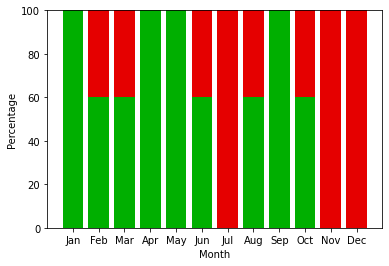

In [100]:
import matplotlib.pyplot as plt
# the first call is as usual
plt.bar(Output["Month"], Output["Percent Staff Appl"], color="#00AF00")

# the second one is special to create stacked bar plots
plt.bar(Output["Month"], Output["Percent Outsource Appl"], bottom=Output["Percent Staff Appl"], color="#E50000")

plt.xlabel('Month')  
plt.ylabel('Percentage')

plt.show() 

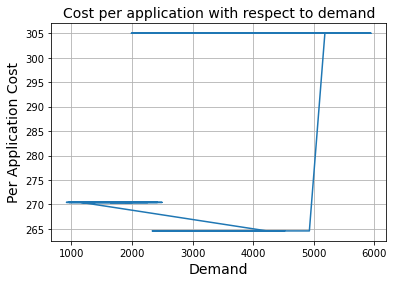

In [101]:
plt.plot(Output['Demand'],Output['Per Application Cost'])
plt.title('Cost per application with respect to demand', fontsize=14)
plt.xlabel('Demand', fontsize=14)
plt.ylabel('Per Application Cost', fontsize=14)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Demand'>

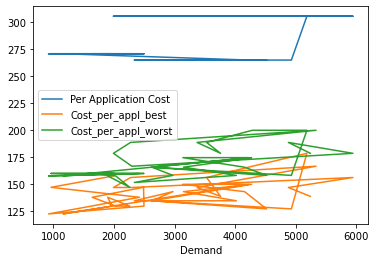

In [102]:
Output.plot('Demand',['Per Application Cost','Cost_per_appl_best','Cost_per_appl_worst'],kind = 'line')